columns = ['Date', 'Highprice', 'Lowprice', 'Closingprice', 'Averageprice', 'Totalvolume', 'Turnover']
df = pd.read_csv('_SSE28770_2022-07-11.csv', skiprows=1, delimiter=';',decimal='.', usecols=columns)
df = df.rename(columns = {'Date':'date', 'Highprice':'high', 'Lowprice':'low', 
                          'Closingprice':'close', 'Averageprice':'average', 'Totalvolume':'volume', 'Turnover':'turnover'})
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.info()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib as mpl

import os
import pandas as pd

import matplotlib.pyplot as plt

In [89]:
from os import listdir
from os.path import isfile, join
mypath = 'stocks'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['ABB-2018-01-01-2022-07-11.csv',
 'ALFA-2018-01-01-2022-07-11.csv',
 'ALIV-SDB-2018-01-01-2022-07-11.csv',
 'ASSA-B-2018-01-01-2022-07-11.csv',
 'ATCO-B-2018-01-01-2022-07-11.csv',
 'AZN-2018-01-01-2022-07-11.csv',
 'BOL-2018-01-01-2022-07-11.csv',
 'ELUX-B-2018-01-01-2022-07-11.csv',
 'ERIC-B-2018-01-01-2022-07-11.csv',
 'ESSITY-B-2018-01-01-2022-07-11.csv',
 'EVO-2018-01-01-2022-07-11.csv',
 'GETI-B-2018-01-01-2022-07-11.csv',
 'HEXA-B-2018-01-01-2022-07-11.csv',
 'HM-B-2018-01-01-2022-07-11.csv',
 'INVE-B-2018-01-01-2022-07-11.csv',
 'KINV-B-2018-01-01-2022-07-11.csv',
 'NDA-SE-2018-01-01-2022-07-11.csv',
 'SAND-2018-01-01-2022-07-11.csv',
 'SBB-B-2018-01-01-2022-07-11.csv',
 'SCA-B-2018-01-01-2022-07-11.csv',
 'SEB-C-2018-01-01-2022-07-11.csv',
 'SHB-B-2018-01-01-2022-07-11.csv',
 'SKF-B-2018-01-01-2022-07-11.csv',
 'SSAB-B-2018-01-01-2022-07-11.csv',
 'SWED-A-2018-01-01-2022-07-11.csv',
 'TEL2-B-2018-01-01-2022-07-11.csv',
 'TELIA-2018-01-01-2022-07-11.csv',
 'VOLV-B-2018-01-01-2

In [145]:

columns = ['Date', 'Opening price', 'High price', 'Low price', 'Closing price', 'Average price', 'Turnover', 'Trades']
df = pd.DataFrame(columns = ['tick'] + columns)

for file in onlyfiles:
    
    df_tick = pd.read_csv('stocks\\' + file, skiprows=1, delimiter=';',decimal=',', usecols=columns)
    
    df_tick['tick'] = file[:4]
    df = pd.concat([df, df_tick])

df = df.rename(columns = {'Date':'date', 'Opening price':'open', 'High price':'high', 'Low price':'low', 
                          'Closing price':'close', 'Average price':'average', 'Turnover':'turnover', 'Trades':'trades'})
    
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['tick','date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31780 entries, 1134 to 0
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tick      31780 non-null  object        
 1   date      31780 non-null  datetime64[ns]
 2   open      31753 non-null  float64       
 3   high      31753 non-null  float64       
 4   low       31753 non-null  float64       
 5   close     31780 non-null  float64       
 6   average   31753 non-null  float64       
 7   turnover  31753 non-null  float64       
 8   trades    31780 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.4+ MB


In [146]:
df

,tick,date,open,high,low,close,average,turnover,trades
1134,ABB-,2018-01-02,220.30,220.90,218.90,220.20,219.838,2.680275e+08,3136
1133,ABB-,2018-01-03,219.60,221.90,219.20,220.60,220.474,3.143984e+08,3492
1132,ABB-,2018-01-04,221.70,223.30,220.90,222.80,222.087,2.458523e+08,2882
1131,ABB-,2018-01-05,223.20,223.80,222.40,223.30,223.006,1.033424e+08,1323
1130,ABB-,2018-01-08,225.00,226.50,223.40,226.20,225.115,3.042138e+08,3190
...,...,...,...,...,...,...,...,...,...
4,VOLV,2022-07-05,161.64,162.26,155.00,155.00,157.223,5.900138e+08,10405
3,VOLV,2022-07-06,156.90,159.36,156.10,158.70,158.173,5.415284e+08,8489
2,VOLV,2022-07-07,160.50,165.94,159.32,165.86,163.863,6.224379e+08,10994
1,VOLV,2022-07-08,166.00,169.66,165.12,169.26,168.117,5.138235e+08,8383


In [147]:

fill_col = ['open', 'close', 'low', 'high']


for tick in df['tick'].unique():
    df.loc[df['tick']==tick,:] = df.loc[df['tick']==tick,:].ffill()
    df.loc[df['tick']==tick,'close_rolling_20_m1'] = df.loc[df['tick']==tick,'close'].shift(1).rolling(20).mean()
    df.loc[df['tick']==tick,'turnover_rolling_20_m1'] = df.loc[df['tick']==tick,'turnover'].shift(1).rolling(20).mean()
    df.loc[df['tick']==tick,'close_m1'] = df.loc[df['tick']==tick,'close'].shift(1)
    df.loc[df['tick']==tick,'turnover_m1'] = df.loc[df['tick']==tick,'turnover'].shift(1)
    
    df.loc[df['tick']==tick,'close_open_m1_pct'] = df.loc[df['tick']==tick,'open'].shift(1).div(df.loc[df['tick']==tick,'close'].shift(2))
    df.loc[df['tick']==tick,'close_close_m1_pct'] = df.loc[df['tick']==tick,'close'].shift(1).div(df.loc[df['tick']==tick,'close'].shift(2))
    df.loc[df['tick']==tick,'open_close_m1_pct'] = df.loc[df['tick']==tick,'close'].shift(1).div(df.loc[df['tick']==tick,'open'].shift(1))
    
    df.loc[df['tick']==tick,'close_open_spread_rolling_20_m1'] = (df.loc[df['tick']==tick,'close_open_m1_pct'] - df.loc[df['tick']==tick,'open_close_m1_pct']).rolling(40).mean()
    
    df.loc[df['tick']==tick,'close_m1_norm'] = df.loc[df['tick']==tick,'close_m1'].div(df.loc[df['tick']==tick,'close_rolling_20_m1'])
    df.loc[df['tick']==tick,'turnover_m1_norm'] = df.loc[df['tick']==tick,'turnover_m1'].div(df.loc[df['tick']==tick,'turnover_rolling_20_m1'])
    df.loc[df['tick']==tick,'open_close_m1_pct'] = df.loc[df['tick']==tick,'close'].shift(1).div(df.loc[df['tick']==tick,'open'].shift(1))
    df.loc[df['tick']==tick,'low_high_m1_pct'] = df.loc[df['tick']==tick,'high'].shift(1).div(df.loc[df['tick']==tick,'low'].shift(1))
    
    
    
    df.loc[df['tick']==tick,'close_open_pct'] = df.loc[df['tick']==tick,'open'].div(df.loc[df['tick']==tick,'close'].shift(1))
    df.loc[df['tick']==tick,'close_close_pct'] = df.loc[df['tick']==tick,'close'].div(df.loc[df['tick']==tick,'close'].shift(1))
    df.loc[df['tick']==tick,'open_close_pct'] = df.loc[df['tick']==tick,'close'].div(df.loc[df['tick']==tick,'open'])
    df.loc[df['tick']==tick,'open_close_p20_pct'] = df.loc[df['tick']==tick,'close'].shift(-20).div(df.loc[df['tick']==tick,'open'])

pct_threshold = 1
df[['close_open_win', 'open_close_win', 'close_close_win', 'open_close_p20_win']] = 0
df.loc[df['close_open_pct'] > pct_threshold, 'close_open_win'] = 1
df.loc[df['open_close_pct'] > pct_threshold, 'open_close_win'] = 1
df.loc[df['close_close_pct'] > pct_threshold, 'close_close_win'] = 1
df.loc[df['open_close_p20_pct'] > pct_threshold, 'open_close_p20_win'] = 1

#df = df.dropna()

df#.iloc[1130:1140, :]

,tick,date,open,high,low,close,average,turnover,trades,close_rolling_20_m1,...,turnover_m1_norm,low_high_m1_pct,close_open_pct,close_close_pct,open_close_pct,open_close_p20_pct,close_open_win,open_close_win,close_close_win,open_close_p20_win
1134,ABB-,2018-01-02,220.30,220.90,218.90,220.20,219.838,2.680275e+08,3136,NaN,...,NaN,NaN,NaN,NaN,0.999546,1.000908,0,0,0,1
1133,ABB-,2018-01-03,219.60,221.90,219.20,220.60,220.474,3.143984e+08,3492,NaN,...,NaN,1.009137,0.997275,1.001817,1.004554,0.999089,0,1,1,0
1132,ABB-,2018-01-04,221.70,223.30,220.90,222.80,222.087,2.458523e+08,2882,NaN,...,NaN,1.012318,1.004986,1.009973,1.004962,0.996843,1,1,1,0
1131,ABB-,2018-01-05,223.20,223.80,222.40,223.30,223.006,1.033424e+08,1323,NaN,...,NaN,1.010865,1.001795,1.002244,1.000448,0.976703,1,1,1,0
1130,ABB-,2018-01-08,225.00,226.50,223.40,226.20,225.115,3.042138e+08,3190,NaN,...,NaN,1.006295,1.007613,1.012987,1.005333,0.943111,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,VOLV,2022-07-05,161.64,162.26,155.00,155.00,157.223,5.900138e+08,10405,166.862,...,0.419798,1.016577,1.006100,0.964770,0.958921,NaN,1,0,0,0
3,VOLV,2022-07-06,156.90,159.36,156.10,158.70,158.173,5.415284e+08,8489,165.662,...,1.056083,1.046839,1.012258,1.023871,1.011472,NaN,1,1,1,0
2,VOLV,2022-07-07,160.50,165.94,159.32,165.86,163.863,6.224379e+08,10994,164.700,...,0.970034,1.020884,1.011342,1.045117,1.033396,NaN,1,1,1,0
1,VOLV,2022-07-08,166.00,169.66,165.12,169.26,168.117,5.138235e+08,8383,164.110,...,1.098089,1.041552,1.000844,1.020499,1.019639,NaN,1,1,1,0


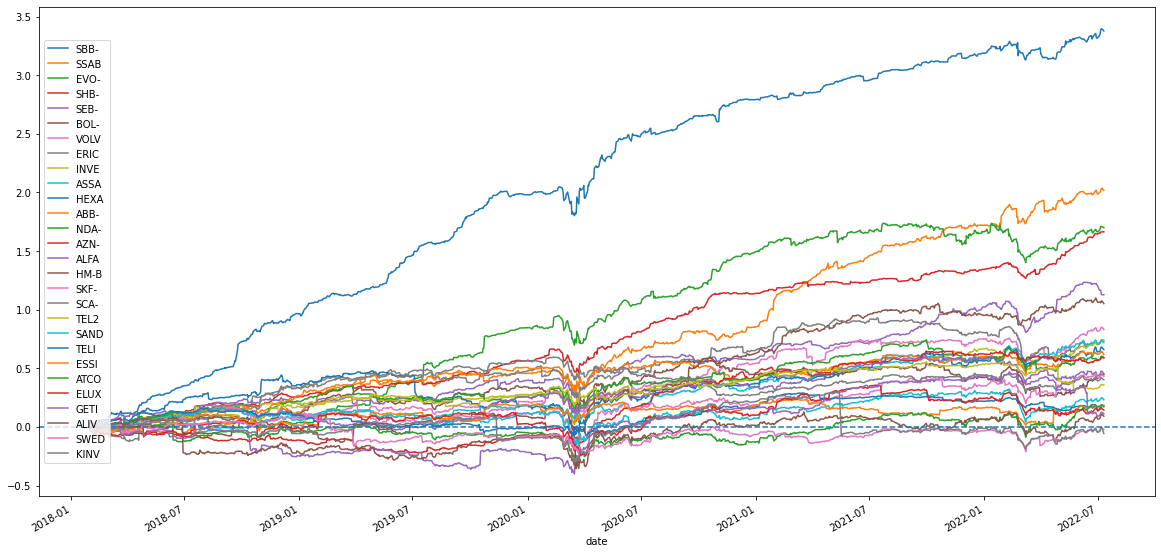

In [132]:
f, ax = plt.subplots(figsize= (20, 10))

#df.groupby(['date', 'tick'])['open_close_pct'].mean().sub(1).unstack().cumsum().plot(ax=ax, legend=False, color='red')
df_cell = df.groupby(['date', 'tick'])['close_open_pct'].mean().sub(1).unstack().cumsum()
df_cell.sort_values(by=max(df_cell.index), axis=1, ascending=False).plot(ax=ax, legend=True)
ax.legend(loc='center left')
ax.axhline(0, ls='--')

<AxesSubplot:xlabel='close_open_spread_rolling_20_m1', ylabel='open_close_p20_pct'>

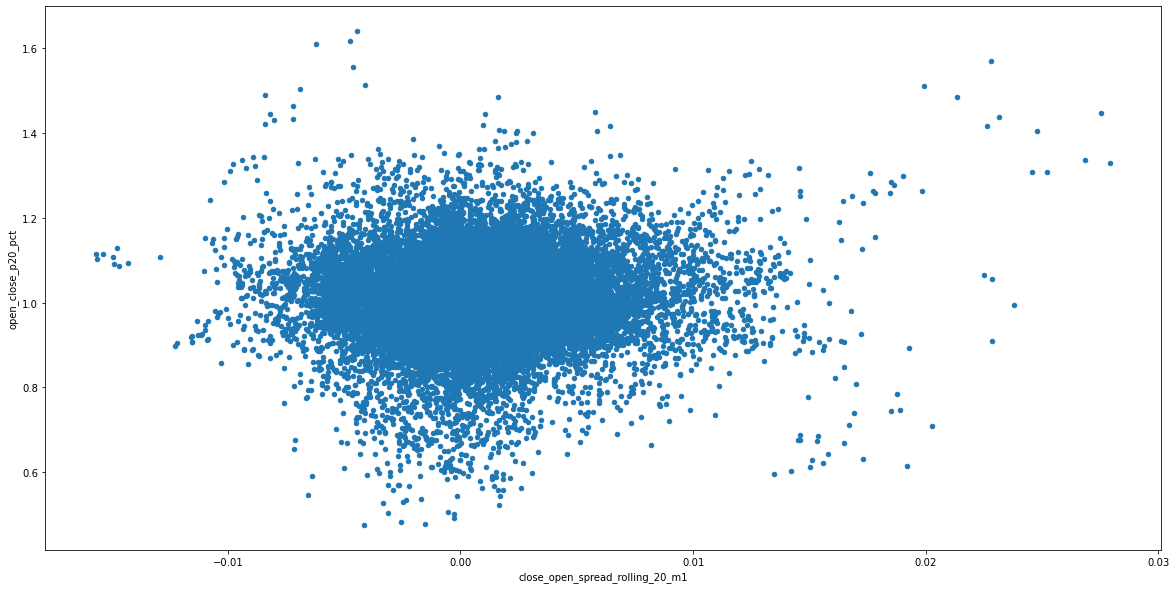

In [148]:
f, ax = plt.subplots(figsize= (20, 10))
df.plot(ax = ax, kind='scatter', x = 'close_open_spread_rolling_20_m1', y = 'open_close_p20_pct')
#ax.set_ylim([0.9, 1.1])
#ax.set_xlim([0.9, 1.1])

In [80]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn import tree

In [150]:
features = ['open_close_m1_pct', 'low_high_m1_pct', 'close_m1_norm', 'close_open_spread_rolling_20_m1']

predict = ['close_open_win', 'open_close_win', 'close_close_win', 'open_close_p20_win']
predict = predict[3]

df_pred = df[features + [predict]].dropna()

#MODEL
X = df_pred.loc[:, features]
Y = df_pred.loc[:, predict]

seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [155]:
df_pred.head()

,open_close_m1_pct,low_high_m1_pct,close_m1_norm,close_open_spread_rolling_20_m1,open_close_p20_win
1093,1.004420,1.015316,0.997148,0.002596,0
1092,0.994112,1.013855,0.991946,0.002839,0
1091,0.990079,1.013052,0.982404,0.002963,0
1090,0.988934,1.015549,0.972762,0.003106,0
1089,1.012984,1.017057,0.987627,0.002699,0


In [156]:
df_pred['open_close_p20_win'].mean()

0.5390767824497258

In [152]:
scale_pos_weight = Y[Y == 0].count()/Y[Y==1].count()

model = XGBClassifier(scale_pos_weight = scale_pos_weight, max_depth = 4, eval_metric="error",
                  n_jobs = 2, use_label_encoder=False)


eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", 
      eval_set=eval_set, 
      verbose=False)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.92%


In [64]:
#BALANCE DATASET

from sklearn.utils import resample
X_oversampled, y_oversampled = resample(X[Y == 0],
                                        Y[Y == 0],
                                        replace=True,
                                        n_samples=X[Y == 1].shape[0],
                                        random_state=123)

X_balanced = np.vstack((X[Y == 1], X_oversampled))
y_balanced = np.hstack((Y[Y == 1], y_oversampled))


In [153]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5295973884657236


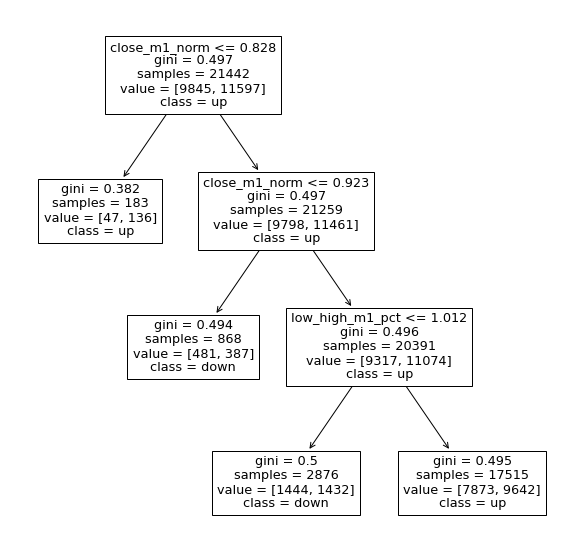

In [154]:
f, ax = plt.subplots(figsize=(10, 10))

tree.plot_tree(clf, class_names = ['down', 'up'], feature_names = features)
print()

In [67]:
df_trades = df[(df['low_high_m1_pct'] > 2) & (df['close_m1_norm'] < 0.96)]
df_trades.sort_values(by='close_open_pct')

,tick,date,open,high,low,close,average,turnover,trades,close_rolling_20_m1,close_m1,close_m1_norm,open_close_m1_pct,low_high_m1_pct,close_open_pct,close_close_pct,open_close_pct,close_open_win,open_close_win,close_close_win
291,KINV,2021-05-17,256.00,265.35,252.60,254.55,256.011,5.599927e+08,28468,445.8750,410.95,0.921671,3.579080,4.302030,-37.705317,-38.058158,-0.566406,0,0,0
1012,ALIV,2018-06-29,939.80,950.00,901.60,921.80,919.290,7.175545e+08,10869,1348.8250,1256.50,0.931552,-4.230183,4.701195,-25.204934,-26.637485,-1.915301,0,0,0
17,GETI,2022-06-15,205.20,216.40,205.20,206.20,209.320,1.023844e+09,19565,278.8250,250.00,0.896620,-1.107595,3.420523,-17.920000,-17.520000,0.487329,0,0,0
581,ELUX,2020-03-18,108.35,115.20,104.15,106.50,107.415,3.543483e+08,11167,187.4950,131.35,0.700552,-5.503597,17.791667,-17.510468,-18.918919,-1.707430,0,0,0
936,GETI,2018-10-15,79.00,82.26,74.74,75.08,78.236,6.357491e+08,18158,101.6045,92.02,0.905669,-2.231194,3.156510,-14.149098,-18.409042,-4.962025,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,EVO-,2020-03-20,306.00,338.00,297.00,333.50,317.625,6.061309e+08,11297,356.7000,278.50,0.780768,-4.130809,13.992537,9.874327,19.748654,8.986928,1,1,1
422,SBB-,2020-11-03,27.70,27.70,25.76,26.66,26.564,2.909416e+08,9659,26.8230,25.06,0.934273,1.952807,3.292181,10.534717,6.384677,-3.754513,1,0,1
577,SBB-,2020-03-24,16.50,16.70,15.34,16.24,15.892,1.728392e+08,6177,22.4355,14.92,0.665017,4.189944,14.122682,10.589812,8.847185,-1.575758,1,0,1
577,HM-B,2020-03-24,120.62,123.16,113.88,123.16,119.536,1.057261e+09,20281,150.2210,108.78,0.724133,0.796887,6.362773,10.884354,13.219342,2.105787,1,1,1


In [77]:
df_trades['close_open_win'].mean()

1-df['close_open_win'].mean()

0.7865470852017937

In [406]:
idx = df_trades['close_open_pct'].idxmin()
df_trades.loc[idx]

,tick,date,bid,ask,open,high,low,close,average,turnover,trades,close_close_pct,close_open_pct,open_close_pct,open_close_m1_pct,low_high_m1_pct
291,ABB,2021-05-17,282.200,282.300,284.800,285.200,281.500,282.000,282.716,2.056274e+08,2794,-0.774103,0.211119,-0.983146,1.500000,1.790831
291,ALI,2021-05-17,845.000,845.600,845.400,848.200,838.800,844.800,843.659,1.296023e+08,2361,0.047371,0.118427,-0.070972,1.271288,3.134111
291,ASS,2021-05-17,251.300,251.500,254.000,254.800,250.900,250.900,251.749,3.519909e+08,4837,-1.181568,0.039386,-1.220472,1.357285,1.960784
291,ATC,2021-05-17,110.650,110.725,112.250,112.250,109.475,110.400,110.340,1.696195e+08,3891,-1.274313,0.380058,-1.648107,1.589825,2.240000
291,ELU,2021-05-17,239.900,240.000,239.800,241.000,237.800,239.600,239.399,2.056063e+08,4470,0.545531,0.629459,-0.083403,1.707213,2.268836
291,ERI,2021-05-17,110.240,110.260,110.900,111.260,109.800,110.260,110.280,4.066484e+08,8065,0.000000,0.580446,-0.577096,0.054446,1.447947
291,ESS,2021-05-17,292.700,292.900,293.400,293.700,289.900,292.700,291.938,2.386557e+08,4739,0.000000,0.239153,-0.238582,1.140290,1.908397
291,HEX,2021-05-17,114.514,114.571,115.486,115.686,113.686,114.343,114.345,2.591445e+08,5992,-0.743924,0.248264,-0.989730,0.799748,2.381206
291,HM-,2021-05-17,211.900,212.000,212.000,212.900,208.600,212.000,210.960,5.242174e+08,7352,0.047192,0.047192,0.000000,3.720020,3.720020
291,INV,2021-05-17,182.725,182.750,182.925,183.625,180.825,182.750,182.361,6.225547e+08,14527,0.136986,0.232877,-0.095668,1.628846,2.023162


In [407]:
print(df_trades.shape)
print(df.shape)

(12863, 16)
(26105, 16)


In [181]:
df[(df['date']>'2022-03-28') & (df['tick']=='INVE')][['date','open', 'close']].head(10).round(0)

,date,open,close
69,2022-03-29,209.0,210.0
68,2022-03-30,210.0,208.0
67,2022-03-31,209.0,206.0
66,2022-04-01,205.0,209.0
65,2022-04-04,210.0,211.0
64,2022-04-05,211.0,210.0
63,2022-04-06,210.0,208.0
62,2022-04-07,208.0,209.0
61,2022-04-08,212.0,210.0
60,2022-04-11,210.0,207.0


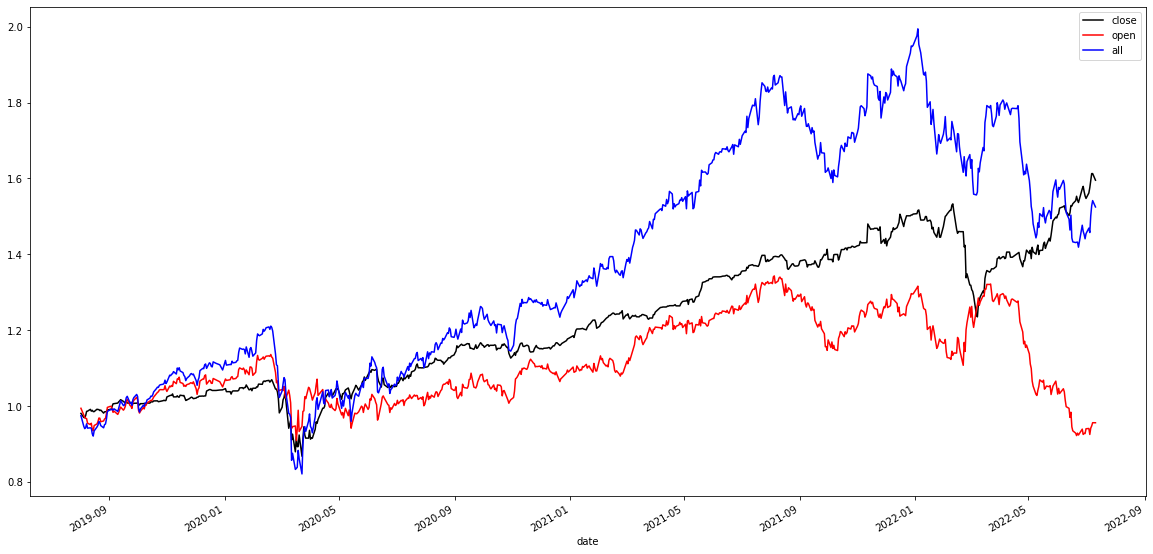

In [171]:
df_cell = df[df['date']>'2019-08-01'].set_index(['date', 'tick'])[['close_open_pct', 'open_close_pct', 'close_close_pct']].unstack()
df_cell_trades = df_trades.set_index(['date', 'tick'])[['close_open_pct', 'open_close_pct', 'close_close_pct']].unstack()

tick = 'INVE'

f, ax = plt.subplots(figsize= (20, 10))
df_cell['close_open_pct'][tick].cumprod().plot(ax=ax, color='black', legend=False)
df_cell['open_close_pct'][tick].cumprod().plot(ax=ax, color='red', legend=False)
df_cell['close_close_pct'][tick].cumprod().plot(ax=ax, color='blue', legend=False)

#df_cell_trades['close_open_pct'].mean(axis=1).cumsum().plot(ax=ax, color='black', ls='--', legend=False)
#df_cell_trades['open_close_pct'].mean(axis=1).cumsum().plot(ax=ax, color='red', ls='--', legend=False)
#df_cell_trades['close_close_pct'].mean(axis=1).cumsum().plot(ax=ax, color='blue', ls='--', legend=False)

ax.legend(['close', 'open', 'all'])


In [172]:
df_cell['close_close_pct'][tick].cumprod()

date
2019-08-02    0.974513
2019-08-05    0.946670
2019-08-06    0.940244
2019-08-07    0.942814
2019-08-08    0.952881
                ...   
2022-07-05    1.457271
2022-07-06    1.501306
2022-07-07    1.528036
2022-07-08    1.541572
2022-07-11    1.524780
Name: INVE, Length: 739, dtype: float64

In [169]:
df_cell['close_open_pct'][tick].sort_values()

date
2020-03-09    0.928971
2020-03-23    0.939319
2022-02-24    0.939808
2020-03-12    0.946764
2020-03-16    0.949584
                ...   
2021-11-12    1.034483
2020-03-25    1.035961
2020-03-17    1.045525
2020-03-24    1.051670
2018-01-02         NaN
Name: INVE, Length: 1135, dtype: float64

In [400]:
df_cell_trades['close_close_pct'].cumsum().mean(axis=1)

date
2018-01-03     1.440628
2018-01-04     0.352721
2018-01-10     0.940036
2018-01-11     0.097550
2018-01-15     0.177359
                ...    
2022-07-04    26.327447
2022-07-05    22.881400
2022-07-07    51.520270
2022-07-08    45.122240
2022-07-11    39.469042
Length: 856, dtype: float64

In [335]:
df_cell['close_open_pct']

tick,ABB,ALF,ALI,ASS,ATC,AZN,BOL,ELU,ERI,ESS,...,HM-,INV,KIN,NDA,SAN,SBB,SCA,SSA,TEL,VOL
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.272480,-0.285122,0.288739,0.382916,-0.063796,0.017483,0.069085,0.307456,0.220994,0.000000,...,0.343358,0.428036,0.036101,0.060108,0.034686,0.321699,0.000000,0.428495,0.245700,0.452196
2018-01-04,0.498640,0.461775,-0.047551,0.733138,0.410095,0.259965,0.655625,0.155340,0.732601,-0.420875,...,0.000000,0.211138,0.460829,0.220884,0.442027,0.000000,0.398593,0.522193,0.196078,0.667302
2018-01-05,0.179533,-0.100705,0.377003,0.232558,-0.123495,0.017361,0.137883,-0.115429,0.328467,0.000000,...,-0.532108,0.309119,0.139276,0.247280,0.066912,0.158053,-0.093765,0.444212,0.048924,0.631313
2018-01-08,0.761308,0.525131,0.559441,0.954309,0.703149,0.465758,0.548885,0.227187,0.000000,0.042159,...,-0.552486,0.615385,0.000000,0.896861,0.795756,0.468311,0.186829,0.052980,0.145068,0.187735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,1.164060,0.675139,1.123295,0.917431,1.237884,0.109769,0.078616,0.370476,0.076687,0.436364,...,0.616796,0.898169,0.970874,0.493151,0.741840,1.557819,0.590745,0.759193,0.879397,0.609984
2022-07-06,-0.109971,1.821061,1.516793,1.512374,2.017188,0.733407,-0.680724,0.740952,1.263514,0.773766,...,1.447411,1.187537,2.083981,1.810364,0.849515,3.587856,0.712106,1.092896,0.888325,1.225806
2022-07-07,0.795948,0.665623,0.509793,0.713967,0.822906,0.790514,1.576763,0.485639,1.074719,0.359066,...,0.500000,1.152705,-0.387597,0.954707,0.474215,0.644438,1.017728,1.845018,0.418936,1.134216


In [336]:
df_cell[['close_open_pct', 'open_close_pct']].cumsum().iloc[-1].unstack().diff().iloc[-1].sort_values()

tick
SBB   -515.071676
SSA   -357.078420
BOL   -173.457500
VOL   -145.678860
ASS   -108.579153
NDA   -107.409449
ERI    -92.116552
ABB    -88.507299
EVO    -80.535341
HM-    -80.338037
INV    -79.794854
ELU    -64.202405
HEX    -60.517649
TEL    -51.247906
ALF    -43.058957
ALI    -21.635403
KIN    -17.128974
AZN    -16.444059
ESS     -9.477146
SAN     -8.348576
ATC     -3.490098
SCA     -1.879588
GET     86.821628
Name: open_close_pct, dtype: float64

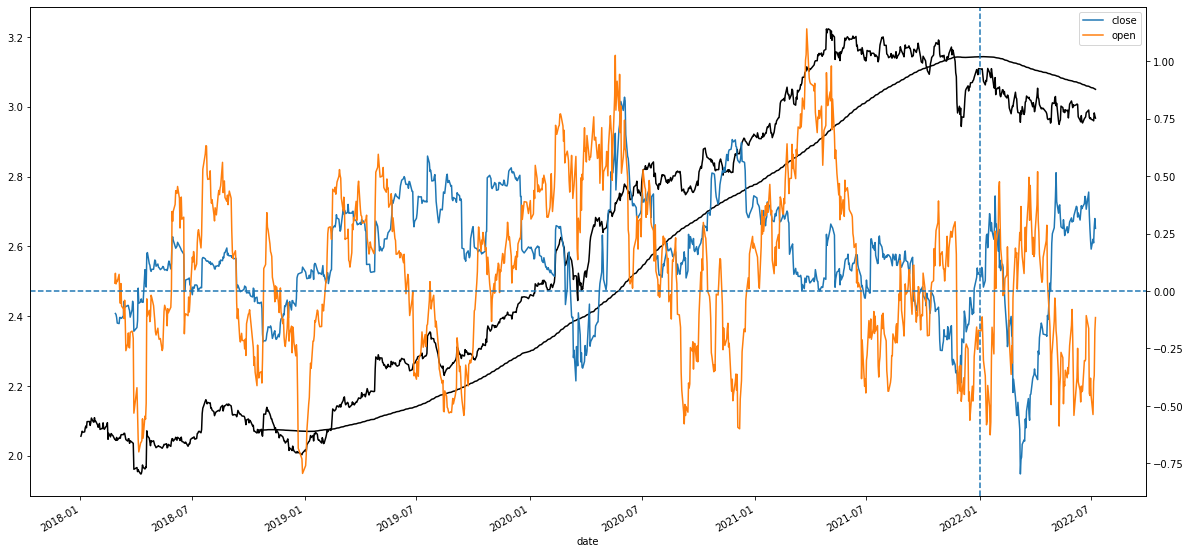

In [241]:
f, ax = plt.subplots(figsize= (20, 10))
df.set_index('date')['close'].apply(np.log10).plot(ax=ax, c='black')
df.set_index('date')['close'].rolling(200).mean().apply(np.log10).plot(ax=ax, c='black')
ax2 = ax.twinx()
df.set_index('date')['close_open_pct'].rolling(40).mean().plot(ax=ax2)
df.set_index('date')['open_close_pct'].rolling(40).mean().plot(ax=ax2)
ax2.legend(['close', 'open'])
ax2.axhline(0, ls='--')
ax2.axvline('2022-01-01', ls='--')

In [215]:


def return_return(row):
    if row['open_high_pct'] > 1:
        return 1
    else:
        return row['open_close_pct']


df_trades['return'] = df_trades.apply(return_return, axis=1)


print(df_trades['return'].mean())
#df_trades

-1.7353043788907325


In [227]:
print(df['close_open_pct'].sum())
print(df['open_close_pct'].sum())
print(df['close_close_pct'].sum())

337.87972193695384
-182.3798753974884
149.8119573152537


In [177]:
df.shape

(3526, 19)

<AxesSubplot:xlabel='date'>

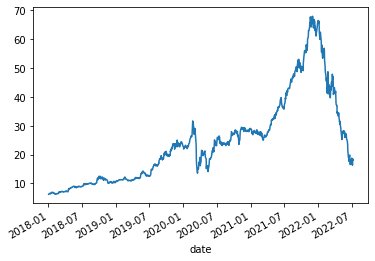

In [228]:
df.set_index('date')['close'].plot()#.iloc[-1,:]['close']/df.iloc[0,:]['open']

In [133]:
df.loc[df['date']>='2022-01-04']

,date,bid,ask,open,high,low,close,average,turnover,trades,close_open,close_open_pct,open_close,low_open,close_rol20_mean,close_rol40_std,close_close
127,2022-01-04,232.65,232.70,231.95,233.90,231.05,232.80,232.708,5.569892e+08,12140,1.30,0.563625,0.85,4.15,219.5875,2.819917,0.932148
126,2022-01-05,228.90,228.95,233.00,233.25,228.00,228.00,229.568,4.300422e+08,10890,0.20,0.085911,-5.00,1.95,220.6825,2.825481,-2.061856
125,2022-01-07,225.30,225.35,224.00,226.45,223.20,225.45,225.260,7.291266e+08,18826,-4.00,-1.754386,1.45,-4.00,221.4200,2.870403,-1.118421
124,2022-01-10,219.00,219.05,225.45,226.45,217.75,218.80,221.225,9.603242e+08,21975,0.00,0.000000,-6.65,2.25,221.6700,2.884892,-2.949656
123,2022-01-11,218.40,218.45,219.00,220.40,216.45,218.55,217.956,8.613396e+08,18361,0.20,0.091408,-0.45,1.25,221.6900,2.968898,-0.114260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-07-04,171.06,171.12,171.34,172.84,170.64,171.46,171.692,3.618742e+08,9256,1.58,0.930726,0.12,5.18,173.4050,3.414158,1.001414
3,2022-07-05,170.02,170.10,173.00,174.30,169.64,170.10,171.225,5.757489e+08,10828,1.54,0.898169,-2.90,2.36,172.7780,3.372263,-0.793188
2,2022-07-06,175.40,175.46,172.12,175.62,171.76,175.24,174.379,5.233676e+08,11037,2.02,1.187537,3.12,2.48,172.1110,3.331760,3.021752
1,2022-07-07,178.02,178.04,177.26,178.40,175.70,178.36,177.299,6.263334e+08,11055,2.02,1.152705,1.10,5.50,171.5650,3.362780,1.780415


<AxesSubplot:label='227f4c1d-c695-4262-a624-34c54dd9dbb2'>

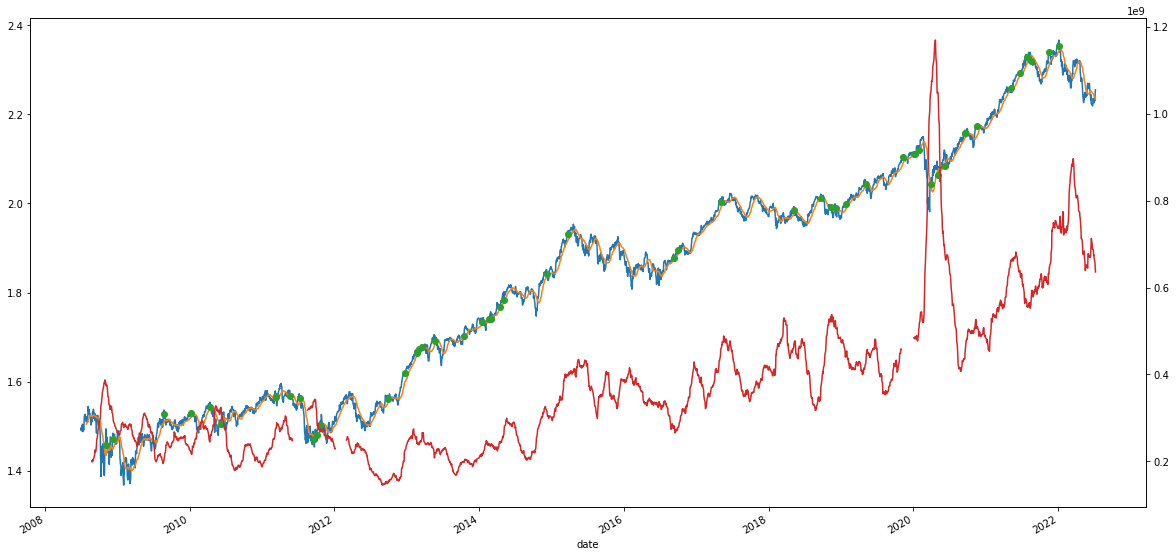

In [154]:
f, ax = plt.subplots(figsize= (20, 10))
df.set_index('date')['close'].apply(np.log10).plot(ax=ax)
df.set_index('date')['close_rol20_mean'].apply(np.log10).plot(ax=ax)
df_trades.set_index('date')['close'].apply(np.log10).plot(ax=ax, marker='o', ls='')
df.set_index('date')['turnover'].rolling(40).mean().plot(ax=ax, secondary_y = True)

Date
2020-07-10    670.2
2020-07-13    664.0
2020-07-14    685.4
2020-07-15    684.2
2020-07-16    670.2
Name: Opening price, dtype: float64

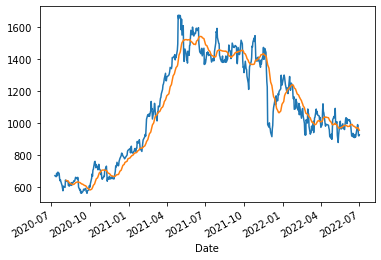

In [24]:
#df = df.groupby(['Execution Time','Transaction ID Code'],as_index=False).agg(agg)
#df = df.rename(columns={'ISIN':'Trades'})
df_cell = df.groupby('Date')['Opening price'].sum()

ax = df_cell.plot()
df_cell.rolling(20).mean().plot(ax=ax)
df_cell.head()

In [93]:
df = df[df['Execution Time'].dt.day == 8].copy()
df['freq'] = df['Execution Time'].diff().dt.seconds
df.head()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
6680,2021-09-08 09:00:04,000026133,156.0,312.0,2,NaN
6679,2021-09-08 09:00:04,000026134,156.0,780.0,5,0.0
6678,2021-09-08 09:00:04,000026135,156.0,1716.0,11,0.0
6677,2021-09-08 09:00:04,000026136,156.0,468.0,3,0.0
6676,2021-09-08 09:00:04,000026137,156.0,780.0,5,0.0


In [23]:
df_time = pd.DataFrame(index = pd.date_range("2021-10-14 09:00", "2021-10-14 17:30", freq="S"))
df = pd.merge(df_time, df, left_index=True, right_on='Execution Time', how='left')
df.head()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
NaN,2021-10-14 09:00:00,NaN,NaN,NaN,NaN,NaN
NaN,2021-10-14 09:00:01,NaN,NaN,NaN,NaN,NaN
NaN,2021-10-14 09:00:02,NaN,NaN,NaN,NaN,NaN
7466.0,2021-10-14 09:00:03,000014963,118.6,2490.6,21.0,NaN
7465.0,2021-10-14 09:00:03,000014964,118.6,3439.4,29.0,0.0


In [91]:
#df['trade_size'] = df['trade_size']
df[['Handle', 'Volume']] = df[['Handle', 'Volume']].fillna(0)
df['Price'] = df['Price'].ffill()
df.head()

,Execution Time,Execution Time UTC,ISIN,Publication Time,Publication Time UTC,CCY,Venue of execution (MIC Code),Venue of publication (MIC Code),Price notation,Transaction to be cleared,MMT Flags,Transaction ID Code,Price,Volume,Buyer,Seller,Trade type,Handle
0,2021-09-08 17:29:32,2021-09-08T15:29:32.430000Z,SE0007871645,2021-09-08 17:29:32,2021-09-08T15:29:32.433000Z,SEK,XSTO,XSTO,MonetaryAmount,N,1K-------P----,001123962,158.7,177,NaN,NaN,NaN,28089.9
1,2021-09-08 17:29:32,2021-09-08T15:29:32.430000Z,SE0007871645,2021-09-08 17:29:32,2021-09-08T15:29:32.433000Z,SEK,XSTO,XSTO,MonetaryAmount,N,1K-------PH---,001123961,158.7,371,NaN,NaN,NaN,58877.7
2,2021-09-08 17:29:32,2021-09-08T15:29:32.430000Z,SE0007871645,2021-09-08 17:29:32,2021-09-08T15:29:32.433000Z,SEK,XSTO,XSTO,MonetaryAmount,N,1K-------PH---,001123960,158.7,1048,NaN,NaN,NaN,166317.6
3,2021-09-08 17:29:32,2021-09-08T15:29:32.430000Z,SE0007871645,2021-09-08 17:29:32,2021-09-08T15:29:32.433000Z,SEK,XSTO,XSTO,MonetaryAmount,N,1K-------PH---,001123959,158.7,191,NaN,NaN,NaN,30311.7
4,2021-09-08 17:29:32,2021-09-08T15:29:32.430000Z,SE0007871645,2021-09-08 17:29:32,2021-09-08T15:29:32.433000Z,SEK,XSTO,XSTO,MonetaryAmount,N,1K-------P----,001123958,158.7,242,NaN,NaN,NaN,38405.4


In [95]:
df = df.reset_index(keep=False)
df.head(20)

,index,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
0,6680,2021-09-08 09:00:04,000026133,156.0,312.0,2,NaN
1,6679,2021-09-08 09:00:04,000026134,156.0,780.0,5,0.0
2,6678,2021-09-08 09:00:04,000026135,156.0,1716.0,11,0.0
3,6677,2021-09-08 09:00:04,000026136,156.0,468.0,3,0.0
4,6676,2021-09-08 09:00:04,000026137,156.0,780.0,5,0.0
5,6675,2021-09-08 09:00:04,000026138,156.0,7020.0,45,0.0
6,6674,2021-09-08 09:00:04,000026139,156.0,10296.0,66,0.0
7,6673,2021-09-08 09:00:04,000026140,156.0,7020.0,45,0.0
8,6672,2021-09-08 09:00:04,000026141,156.0,42744.0,274,0.0
9,6671,2021-09-08 09:00:04,000026142,156.0,5148.0,33,0.0


In [79]:
df.head()#['Price'].diff()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
7423,2021-09-20 09:00:02,000023691,166.5,4329.0,26,NaN
7422,2021-09-20 09:00:02,000023692,166.5,32634.0,196,0.0
7421,2021-09-20 09:00:02,000023693,166.5,24309.0,146,0.0
7420,2021-09-20 09:00:02,000023694,166.5,166.5,1,0.0
7419,2021-09-20 09:00:02,000023695,166.5,2997.0,18,0.0


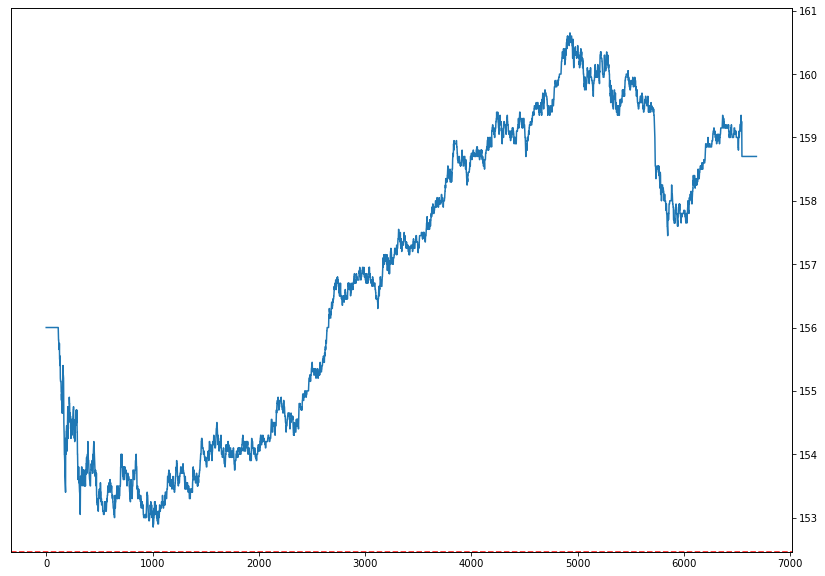

In [96]:
f, ax = plt.subplots(figsize = (14,10))
#df['Volume'].plot(ax=ax)
#df['Price'].diff().rolling(100).median().plot(ax=ax)
df['Price'].plot(ax=ax, secondary_y = True)
ax.axhline(0,ls='--', c='r')

,index,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
35807,NaN,2021-10-14 17:29:56,NaN,117.4,0.0,0.0,NaN
35808,NaN,2021-10-14 17:29:57,NaN,117.4,0.0,0.0,NaN
35809,NaN,2021-10-14 17:29:58,NaN,117.4,0.0,0.0,NaN
35810,NaN,2021-10-14 17:29:59,NaN,117.4,0.0,0.0,NaN
35811,NaN,2021-10-14 17:30:00,NaN,117.4,0.0,0.0,NaN


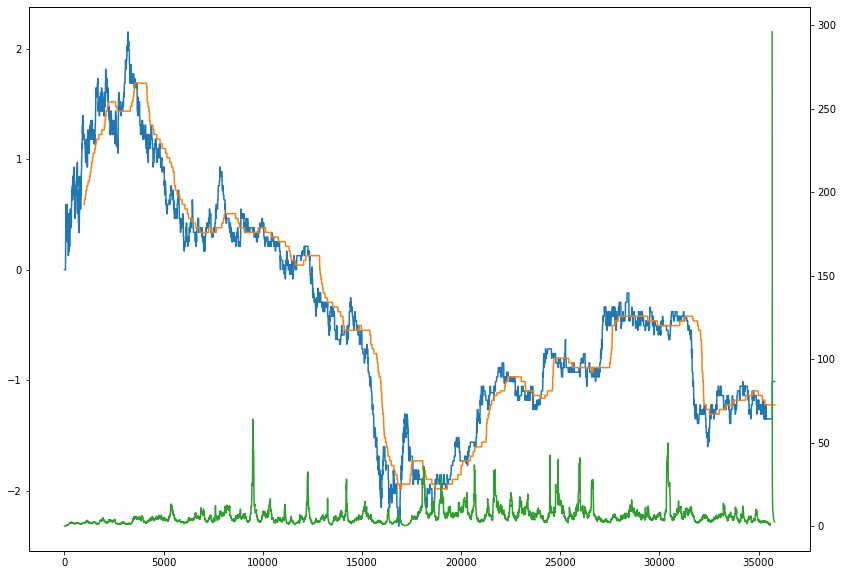

In [29]:
f, ax = plt.subplots(figsize = (14,10))

df['Price'].div(df['Price'].dropna().iloc[0]).mul(100).sub(100).plot(ax=ax)
df['Price'].div(df['Price'].dropna().iloc[0]).mul(100).sub(100).rolling(1000).median().plot(ax=ax)
df['freq'].rolling(200, min_periods=1).mean().plot(ax=ax, secondary_y = True)
#df['Volume'].rolling(1*1).mean().plot(ax=ax, secondary_y = True)
df.tail()

TypeError: Invalid comparison between dtype=int64 and str_

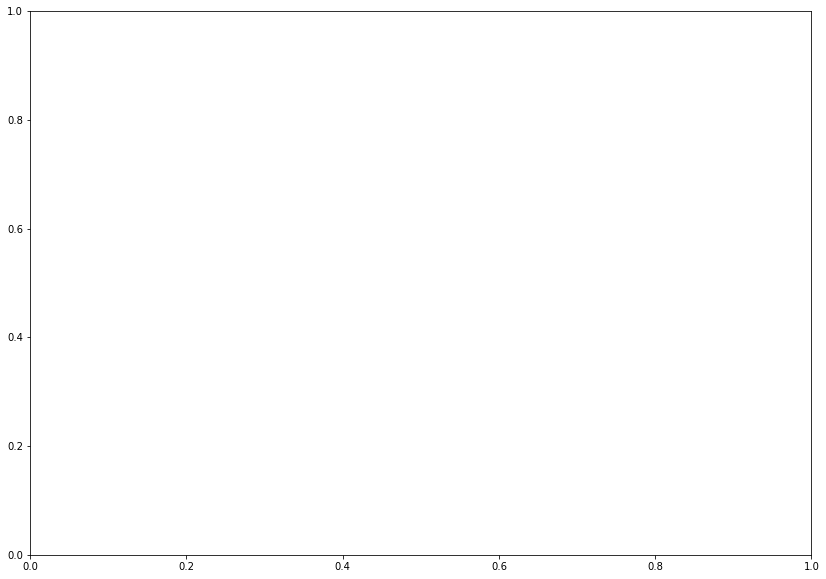

In [76]:
f, ax = plt.subplots(figsize = (14,10))
df_cell = df#[df.index > '2021-09-08 16:30:00']
df_cell = df_cell[df_cell.index < '2021-09-08 17:29:00']
df_cell['Price'].div(df_cell['Price'].dropna().iloc[0]).mul(100).sub(100).plot(ax=ax)
df_cell['Trades'].rolling(60*30).mean().plot(ax=ax, secondary_y = True)
df_cell['Trades'].rolling(1*1).mean().plot(ax=ax, secondary_y = True)

In [221]:
init = 5500
yearly_return = 0.1

my_balance = pd.DataFrame(index = range(10), columns = ['year', 'balance', 'balance_return', 'save', 'save_return', 'return', 'final', 'monthly'])
my_balance['save'] = 100
my_balance['return'] = (1 + yearly_return) ** (my_balance.index + 1)
my_balance['save_return'] = my_balance['save'].mul(my_balance['return']-1).shift(1).fillna(0)
my_balance['balance'] = init# + my_balance['save'].cumsum().fillna(0)
my_balance['balance_return'] = my_balance['balance'].mul(my_balance['return']-1).shift(1).fillna(0)
my_balance['final'] = my_balance['balance'] + my_balance['balance_return'] + my_balance['save'].cumsum() + my_balance['save_return']
my_balance['monthly'] = my_balance['final'].mul(yearly_return).div(12)
my_balance

,year,balance,balance_return,save,save_return,return,final,monthly
0,NaN,5500,0.000000,100,0.000000,1.100000,5600.000000,46.666667
1,NaN,5500,550.000000,100,10.000000,1.210000,6260.000000,52.166667
2,NaN,5500,1155.000000,100,21.000000,1.331000,6976.000000,58.133333
3,NaN,5500,1820.500000,100,33.100000,1.464100,7753.600000,64.613333
4,NaN,5500,2552.550000,100,46.410000,1.610510,8598.960000,71.658000
5,NaN,5500,3357.805000,100,61.051000,1.771561,9518.856000,79.323800
6,NaN,5500,4243.585500,100,77.156100,1.948717,10520.741600,87.672847
7,NaN,5500,5217.944050,100,94.871710,2.143589,11612.815760,96.773465
8,NaN,5500,6289.738455,100,114.358881,2.357948,12804.097336,106.700811
9,NaN,5500,7468.712301,100,135.794769,2.593742,14104.507070,117.537559


In [2]:
import asyncio
from avanza import Avanza, ChannelType
from time import time, ctime
import datetime

time = datetime.datetime.strptime(ctime(1620220062000/1000), "%a %b %d %H:%M:%S %Y")
time.minute

7

In [35]:
def make_binary(x):
    if np.isnan(x):
        return np.nan
    elif x == 0:
        return 0
    elif x < 0:
        return -1
    else:
        return 1

In [36]:
def make_trade(x):
    if np.isnan(x):
        return np.nan
    elif x > 6:
        return 1
    elif x < -2:
        return -1
    else:
        return np.nan

In [17]:
trades = {'long':{'time_buy':np.nan, 
                  'price_buy':0, 
                  'time_sell':np.nan, 
                  'price_sell':0},
         'short':{'time':np.nan, 
                  'price_sell':0, 
                  'price_buy':0}
         }
trades

{'long': {'time_buy': nan, 'price_buy': 0, 'time_sell': nan, 'price_sell': 0},
 'short': {'time': nan, 'price_sell': 0, 'price_buy': 0}}

In [22]:
df_trades = df.set_index('Execution Time')[['Price', 'Handle', 'Volume']].sort_index()

min_of_grace = 10

max_recorded = 0
min_recorded = np.inf

buy_long = 0
buy_short = 0
sell_long = 0
sell_short = 0

nbr_trades_required = 5
count_nbr_trades = 0
stop_loss_pct = 0.01
stop_loss = 0

min_price = np.inf
max_price = 0

for idx, row in df_trades.iterrows():
    
    #GRACE PERIOD
    if (idx.hour == 9) & (idx.minute < min_of_grace):
        if max_recorded < row['Price']:
            max_recorded = row['Price']
            print('New Max:', max_recorded)
        if min_recorded > row['Price']:
            min_recorded = row['Price']
            print('New Min:', max_recorded)
        continue
    
    #COUNT LONGS & SHORTS
    if row['Price'] > max_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades < nbr_trades_required:
        count_nbr_trades += 1
        print('buy counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue
    elif row['Price'] < min_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades < nbr_trades_required:
        count_nbr_trades += 1
        print('sell counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue
        
    #TRADE TIME
    if (idx.hour == 9) & (idx.minute < 20):
        if row['Price'] > max_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades >= nbr_trades_required: #Long!
            buy_long = row['Price']
            stop_loss = row['Price'] * (1 - stop_loss_pct)
            print('Time: '+ str(idx))
            print('Go Long: '+str(buy_long))
            print('Set Stop loss: '+str(stop_loss))
            trades['long']['time_buy'] = idx
            trades['long']['price_buy'] = buy_long
            count_nbr_trades = 0
            continue
        elif row['Price'] < min_recorded and buy_short == 0 and buy_long == 0 and count_nbr_trades >= nbr_trades_required: #Short!
            buy_short = row['Price']
            stop_loss = row['Price'] * (1 + stop_loss_pct)
            print('Time: '+str(idx))
            print('Go Short: '+str(buy_short))
            print('Set Stop loss: '+str(stop_loss))
            count_nbr_trades = 0
            continue
            
            
            
    ## HERE!!
    if buy_long > 0 and row['Price'] <= stop_loss and count_nbr_trades < nbr_trades_required: #SELL
        count_nbr_trades += 1
        print('sell counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue


    if buy_long > 0 and row['Price'] <= stop_loss: #SELL
        sell_long = row['Price']
        print('Time: '+ str(idx))
        print('Close Long:', sell_long)
        trades['long']['time_sell'] = idx
        trades['long']['price_sell'] = sell_long
        break
    
    elif buy_long > 0 and row['Price'] > buy_long and row['Price'] > max_price: #Increase stop loss
        stop_loss = row['Price'] * (1 - stop_loss_pct)
        print('Increase stop limit:', stop_loss)
        
    elif buy_short > 0 and row['Price'] >= stop_loss: #Buy back:
        sell_short = row['Price']
        print('Time: '+ str(idx))
        print('Close short', sell_short)
        break
    elif buy_short > 0 and row['Price'] < buy_short and row['Price'] < min_price: #Decrease stop loss
        stop_loss = row['Price'] * (1 + stop_loss_pct)
        print('Adjust stop loss: '+str(stop_loss))
        
    last_trade = row['Price']
    max_price = max(max_price, row['Price'])
    min_price = min(min_price, row['Price'])
    
print(max_recorded, min_recorded)

New Max: 1495.0
New Min: 1495.0
New Max: 1498.6
New Max: 1498.8
New Max: 1499.0
New Max: 1502.0
New Max: 1502.8
New Max: 1503.2
New Max: 1504.2
New Max: 1506.0
New Max: 1506.4
New Max: 1506.8
New Max: 1509.0
New Max: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Max: 1511.0
New Max: 1513.6
New Max: 1513.8
New Max: 1515.0
New Max: 1515.2
New Max: 1515.4
New Max: 1515.6
New Max: 1516.0
New Max: 1516.4
New Max: 1517.0
New Max: 1518.0
buy counter: 1 1518.2 168520.2
buy counter: 2 1519.0 6076.0
buy counter: 3 1519.0 221774.0
buy counter: 4 1518.8 72902.4
buy counter: 5 

In [19]:
df_trades

,Price,Handle,Volume
Execution Time,,,
2021-04-27 09:00:02,1495.0,68770.0,46
2021-04-27 09:00:02,1495.0,14950.0,10
2021-04-27 09:00:02,1495.0,1495.0,1
2021-04-27 09:00:02,1495.0,4485.0,3
2021-04-27 09:00:02,1495.0,7475.0,5
...,...,...,...
2021-04-27 17:29:30,1671.2,66848.0,40
2021-04-27 17:29:30,1671.2,8417834.4,5037
2021-04-27 17:29:30,1671.2,5545041.6,3318


In [20]:
(2*2+1*1)/3

1.6666666666666667

Text(2021-04-27 09:31:53, 1562.8, '2.87%')

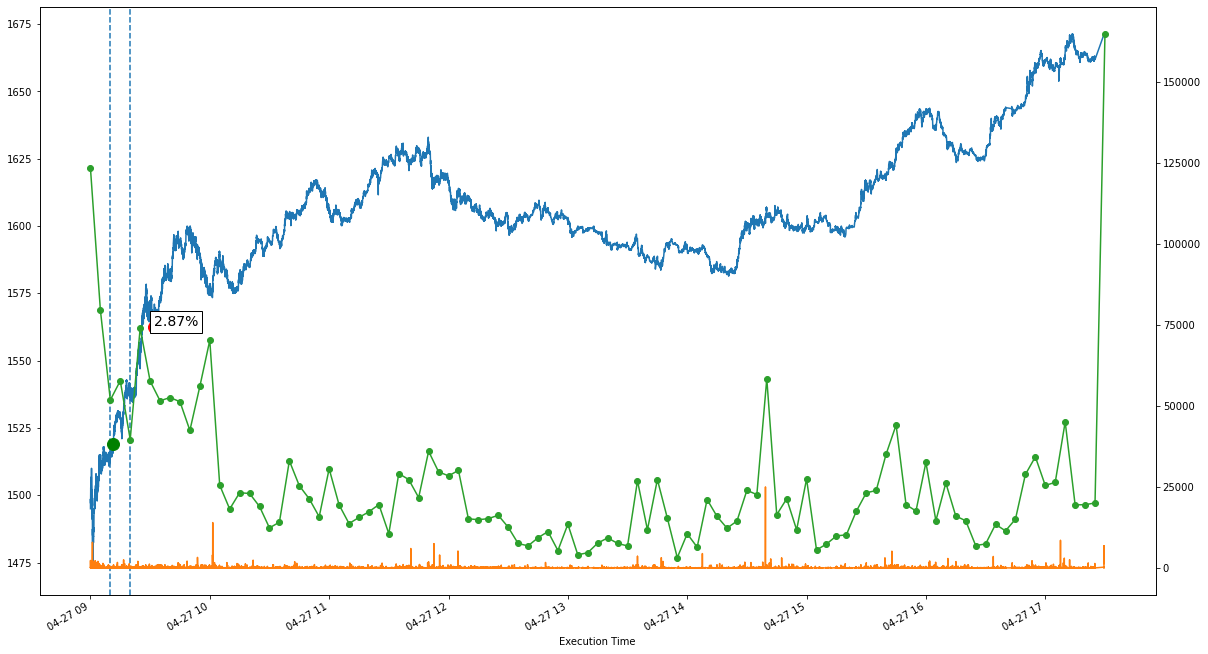

In [53]:
f, ax = plt.subplots(figsize = (20, 12))


ax = df_trades['Price'].plot(ax=ax)
df_trades['Volume'].plot(ax=ax, secondary_y = True)
agg = {'Price':'mean','Handle':'sum','Volume':'sum'}
df_trades_time = df_trades.reset_index()
df_trades_time = df_trades_time.groupby(df_trades_time['Execution Time'].dt.round('5min')).agg(agg)
df_trades_time['Price_weighted'] = df_trades_time['Handle'].div(df_trades_time['Volume'])

df_trades_time['Volume'].plot(ax=ax, secondary_y = True, marker='o')

ax.axvline('2021-04-27 09:10:00', ls='--')
ax.axvline('2021-04-27 09:20:00', ls='--')
#df_trades.loc[trades['long']['time']].plot()
ax.plot(trades['long']['time_buy'], trades['long']['price_buy'], marker='o', c='g', ms=12)
ax.plot(trades['long']['time_sell'], trades['long']['price_sell'], marker='o', c='r', ms=12)
pct_gain = trades['long']['price_sell']/trades['long']['price_buy']
ax.text(x=trades['long']['time_sell'], y=trades['long']['price_sell']+0.2, 
        s=f'{round(100*(pct_gain-1), 2)}%', fontsize = 14, bbox=dict(facecolor='white', alpha=1))
#max_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_max'].max()
#min_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_min'].min()
#ax[0].axhline(max_, ls='--')
#ax[0].axhline(min_, ls='--')

In [115]:
df_trades_time

,Price,Handle,Volume,Price_weighted
Execution Time,,,,
2021-04-27 09:00:00,157.206361,48678838.60,309121,157.475030
2021-04-27 10:00:00,160.196475,70853112.28,442284,160.198226
2021-04-27 11:00:00,161.140414,46122060.27,286124,161.196056
2021-04-27 12:00:00,161.495951,28034592.65,173591,161.497962
2021-04-27 13:00:00,160.444506,19031275.20,118639,160.413314


In [107]:
df_trades

,Price,Handle,Volume
Execution Time,,,
2021-04-27 09:00:02,156.45,625.80,4
2021-04-27 09:00:02,156.45,2503.20,16
2021-04-27 09:00:02,156.45,5006.40,32
2021-04-27 09:00:02,156.45,4380.60,28
2021-04-27 09:00:02,156.45,782.25,5
...,...,...,...
2021-04-27 13:08:15,159.55,12444.90,78
2021-04-27 13:08:15,159.55,14040.40,88
2021-04-27 13:08:40,159.60,159.60,1


In [335]:
agg = {'Price':['mean', 'min', 'max'], 'Volume':['sum']}
df_cell = df.groupby(df['Execution Time'].dt.round('min')).agg(agg)
df_cell.columns = [ '_'.join(x) for x in df_cell.columns]
df_cell['diff'] = df_cell['Price_mean'].diff()
df_cell['binary_up_down'] = df_cell['Price_mean'].diff().apply(make_binary)
df_cell['binary_up_down_cumsum'] = df_cell['binary_up_down'].cumsum()
df_cell['binary_up_down_rolling'] = df_cell['binary_up_down'].rolling(20).sum()
df_cell['pct_change'] = df_cell['Price_mean'].pct_change()
df_cell['abs_pct_change'] = df_cell['Price_mean'].div(df_cell['Price_mean'].iloc[0])-1
df_cell['mini'] = df_cell['pct_change'].mul(df_cell['Price_mean'].shift(0)).div(df_cell['Price_mean'].iloc[0]).cumsum()
df_cell['trade'] = df_cell['binary_up_down_rolling'].apply(make_trade).ffill().fillna(0).diff().replace(-2,-1).replace()
df_cell.head(110)

,Price_mean,Price_min,Price_max,Volume_sum,diff,binary_up_down,binary_up_down_cumsum,binary_up_down_rolling,pct_change,abs_pct_change,mini,trade
Execution Time,,,,,,,,,,,,
2021-04-27 09:00:00,156.446269,156.20,156.50,21737,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2021-04-27 09:01:00,155.786854,155.00,156.40,20368,-0.659414,-1.0,-1.0,NaN,-0.004215,-0.004215,-0.004197,0.0
2021-04-27 09:02:00,155.700000,155.05,156.20,6733,-0.086854,-1.0,-2.0,NaN,-0.000558,-0.004770,-0.004752,0.0
2021-04-27 09:03:00,156.341667,156.10,156.45,1597,0.641667,1.0,-1.0,NaN,0.004121,-0.000669,-0.000634,0.0
2021-04-27 09:04:00,156.290244,156.00,156.50,16546,-0.051423,-1.0,-2.0,NaN,-0.000329,-0.000997,-0.000962,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27 10:45:00,161.452000,161.30,161.60,7771,0.139500,1.0,7.0,2.0,0.000865,0.031996,0.032159,0.0
2021-04-27 10:46:00,161.589583,161.45,161.65,3493,0.137583,1.0,8.0,4.0,0.000852,0.032876,0.033039,0.0
2021-04-27 10:47:00,161.477586,161.35,161.60,10889,-0.111997,-1.0,7.0,4.0,-0.000693,0.032160,0.032324,0.0


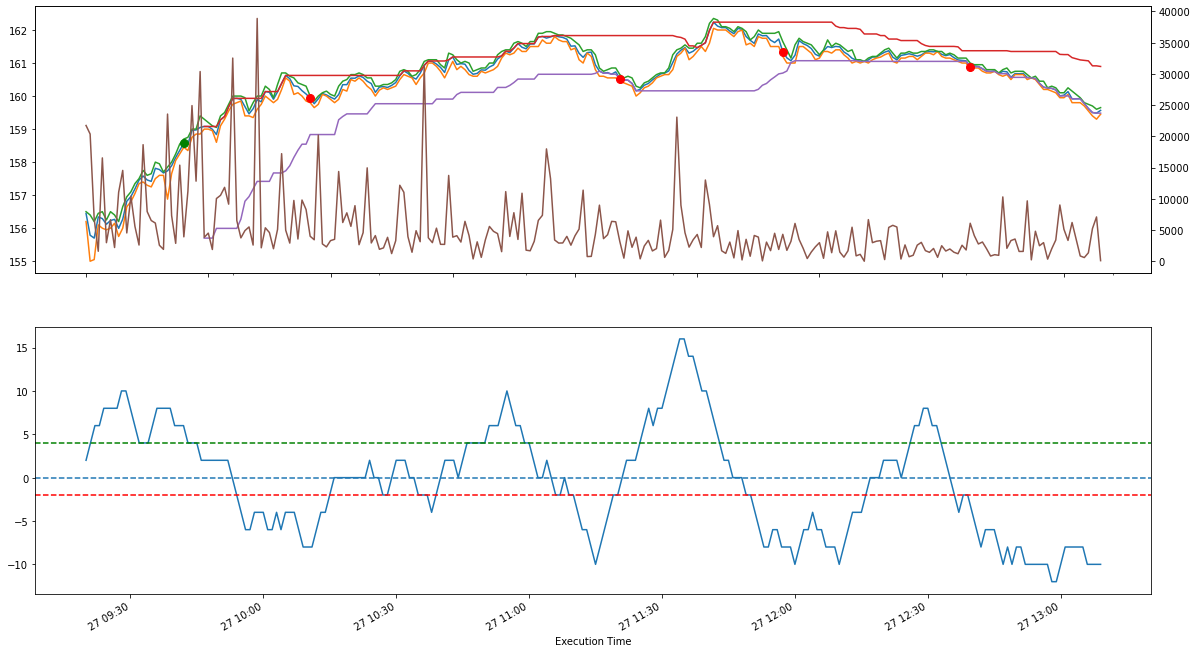

In [336]:
import datetime

f, ax = plt.subplots(2,1,figsize = (20,12))

df_cell['Price_mean'].plot(ax=ax[0])
df_cell['Price_min'].plot(ax=ax[0])
df_cell['Price_max'].plot(ax=ax[0])
df_cell['Price_mean'].rolling(30).max().plot(ax=ax[0])
df_cell['Price_mean'].rolling(30).min().plot(ax=ax[0])
df_cell.loc[df_cell['trade'] == 1, 'Price_mean'].plot(ax=ax[0], marker='o', ls='', c='g', ms=8)
df_cell.loc[df_cell['trade'] == -1, 'Price_mean'].plot(ax=ax[0], marker='o', ls='',c='r', ms=8)
df_cell['Volume_sum'].plot(ax=ax[0], secondary_y=True)
df_cell['binary_up_down_rolling'].plot(ax=ax[1])
ax[1].axhline(0,ls='--')
ax[1].axhline(4,ls='--', c='g')
ax[1].axhline(-2,ls='--', c='r')

#ax[0].axvline('2021-04-23 09:05:00', ls='--')
#ax[0].axvline('2021-04-23 09:20:00', ls='--')

#max_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_max'].max()
#min_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_min'].min()

ax[0].axhline(max_, ls='--')
ax[0].axhline(min_, ls='--')


<AxesSubplot:xlabel='Execution Time,Execution Time'>

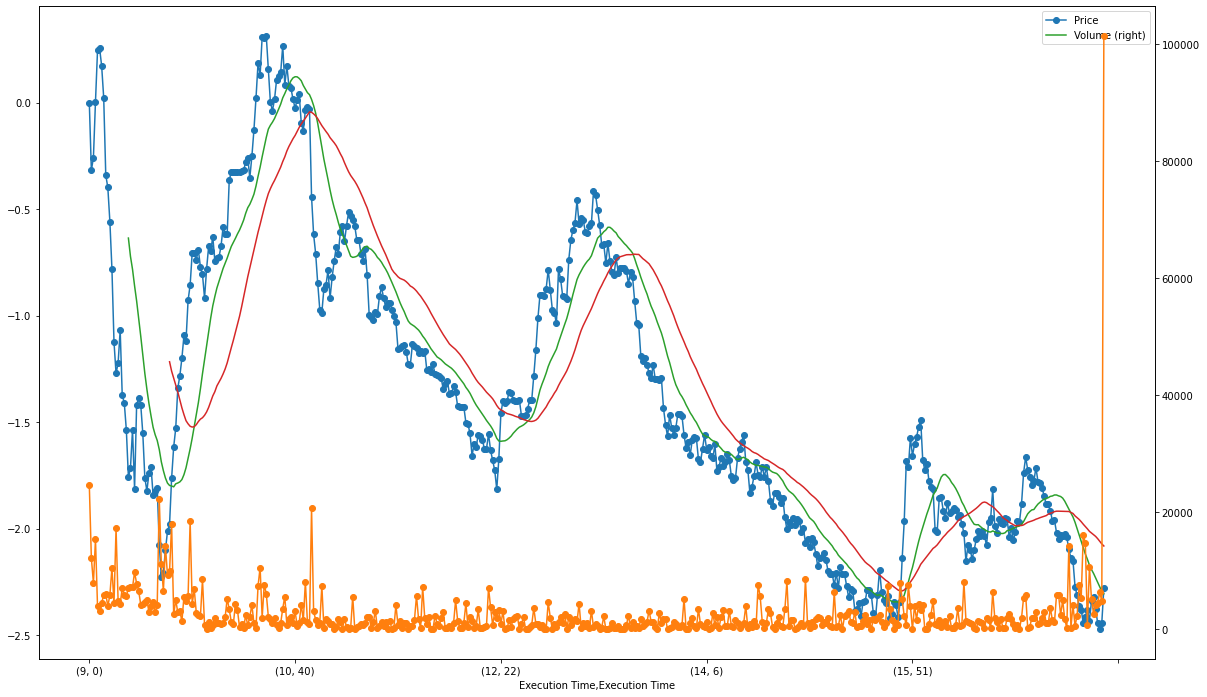

In [12]:
f, ax = plt.subplots(figsize = (20,12))
df_cell = df.groupby([df['Execution Time'].dt.hour, df['Execution Time'].dt.minute])[['Handle', 'Volume']].sum()
df_cell['Price'] = df_cell['Handle'].div(df_cell['Volume'])
df_cell['Price'] = df_cell['Price'].div(df_cell['Price'].iloc[0]).sub(1).mul(100)
df_cell[['Price', 'Volume']].plot(secondary_y='Volume', ax=ax, marker= 'o')
df_cell['Price'].rolling(20).mean().plot()
df_cell['Price'].rolling(40).mean().plot()

In [88]:
hashlib.sha1

<function _hashlib.openssl_sha1(string=b'')>

In [93]:
import hashlib
import pyotp
totp = pyotp.TOTP('HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ', digest=hashlib.sha1)
print(totp.now())

244846


In [11]:
from avanza import Avanza
avanza = Avanza({
    'username': 'HjartarsonErik',
    'password': 'uzLfiSqA',
    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
})

overview = avanza.get_overview()
overview

avanza.


{'accounts': [{'accountType': 'AktieFondkonto',
   'interestRate': 0.0,
   'depositable': True,
   'attorney': False,
   'active': True,
   'accountId': '1413126',
   'accountPartlyOwned': False,
   'tradable': True,
   'totalBalance': 0.68,
   'totalBalanceDue': 0.0,
   'ownCapital': 0.49,
   'buyingPower': 0.49,
   'totalProfitPercent': 0.0,
   'performance': 0.0,
   'performancePercent': 0.0,
   'totalProfit': 0.0,
   'name': '1413126'},
  {'accountType': 'Investeringssparkonto',
   'interestRate': 0.0,
   'depositable': True,
   'attorney': False,
   'active': True,
   'accountId': '5635113',
   'accountPartlyOwned': False,
   'tradable': True,
   'totalBalance': 0.74,
   'totalBalanceDue': 0.0,
   'ownCapital': 0.74,
   'buyingPower': 0.74,
   'totalProfitPercent': 0.0,
   'performance': 0.0,
   'performancePercent': 0.0,
   'totalProfit': 0.0,
   'name': 'Familj'},
  {'accountType': 'Investeringssparkonto',
   'interestRate': 0.0,
   'depositable': True,
   'attorney': False,
   

In [3]:
import avanza

msft = avanza.Ticker(3873)
price = msft.buy_price
print(price)

AttributeError: module 'avanza' has no attribute 'Ticker'

In [17]:
from avanza import Avanza, TimePeriod

def callback(data):
    # Do something with the quotes data here
    print(data)

avanza.subscribe_to_id(
        ChannelType.QUOTES,
        "19002", # OMX Stockholm 30
        callback
    )

<coroutine object Avanza.subscribe_to_id at 0x000002F20159D5C0>

In [18]:
import asyncio
from avanza import Avanza, ChannelType

def callback(data):
    # Do something with the quotes data here
    print(data)

async def subscribe_to_channel(avanza: Avanza):
    await avanza.subscribe_to_id(
        ChannelType.QUOTES,
        "19002", # OMX Stockholm 30
        callback
    )

def main():
    avanza = Avanza({
    'username': 'HjartarsonErik',
    'password': 'uzLfiSqA',
    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
    })

    asyncio.get_event_loop().run_until_complete(
        subscribe_to_channel(avanza)
    )
    asyncio.get_event_loop().run_forever()

if __name__ == "__main__":
    main()

RuntimeError: This event loop is already running

In [19]:
a = {'data':{'orderbookId': '56267', 'buyPrice': 146.85, 'sellPrice': 146.95, 'spread': 0.07, 'closingPrice': 144.4, 'highestPrice': 148.6, 'lowestPrice': 145.45, 'lastPrice': 146.95, 'change': 2.55, 'changePercent': 1.77, 'updated': 1620205015000, 'volumeWeightedAveragePrice': 146.84, 'totalVolumeTraded': 452396, 'totalValueTraded': 66429756.8, 'lastUpdated': 1620205015000, 'changePercentNumber': 1.77, 'updatedDisplay': '10:56'}, 
'channel': '/quotes/56267'}

In [31]:
time = a['data']['updatedDisplay']
buy = a['data']['buyPrice']
sell = a['data']['sellPrice']
vol = totalVolumeTraded

string = f'time: {time}, buy: {buy}, sell: {sell}'

print(string)

time: 10:56, buy: 146.85, sell: 146.95


In [80]:
from time import time, ctime

ctime(1620205015000/1000)

'Wed May  5 10:56:55 2021'

In [95]:
from avanza import Avanza, ChannelType


avanza = Avanza({
    'username': 'HjartarsonErik',
    'password': 'uzLfiSqA',
    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
    })

df = avanza.getChartdata().get_ticker_chartdata(549768)
df.plot(kind='line', x='timestamp', y='value')
plt.show()

TypeError: string indices must be integers

In [3]:

import matplotlib.pyplot as plt

df = avanza.ChartData().get_ticker_chartdata(3873)
df.plot(kind='line', x='timestamp', y='value')
plt.show()

AttributeError: module 'avanza' has no attribute 'ChartData'

In [4]:
from avanza import Avanza, ChannelType, TimePeriod

avanza = Avanza({
    'username': 'HjartarsonErik',
    'password': 'uzLfiSqA',
    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
    })

avanza.get_chart_data(order_book_id = '643616', period=TimePeriod.ONE_WEEK)

#avanza.get_transactions

{'dataSeries': [{'timestamp': '2021-09-23T00:00:00.000+0200', 'value': 37.98},
  {'timestamp': '2021-09-24T00:00:00.000+0200', 'value': 37.1},
  {'timestamp': '2021-09-27T00:00:00.000+0200', 'value': 36.22},
  {'timestamp': '2021-09-28T00:00:00.000+0200', 'value': 35.48},
  {'timestamp': '2021-09-29T00:00:00.000+0200', 'value': 34.44},
  {'timestamp': '2021-09-30T00:00:00.000+0200', 'value': 34.24}],
 'comparisonSeries': [{'timestamp': '2021-09-23T00:00:00.000+0200',
   'value': 38.194671943979294},
  {'timestamp': '2021-09-24T00:00:00.000+0200', 'value': 37.79067098710393},
  {'timestamp': '2021-09-27T00:00:00.000+0200', 'value': 37.63939525476807},
  {'timestamp': '2021-09-28T00:00:00.000+0200', 'value': 36.822735010764845},
  {'timestamp': '2021-09-29T00:00:00.000+0200', 'value': 36.84772981319183},
  {'timestamp': '2021-09-30T00:00:00.000+0200', 'value': 36.907031207185256}],
 'min': 34.24,
 'max': 38.194671943979294,
 'floor': 34.0,
 'ceiling': 39.0,
 'change': -3.3200000000000003

In [42]:
from time import time
time('2020')

TypeError: time() takes no arguments (1 given)

In [6]:
#avanza.get_chart_data(order_book_id = '643616', period=TimePeriod.TODAY)

In [51]:
pd.to_datetime(df['dataSeries'][0]['timestamp']).timestamp()

1620630000.0

In [11]:
avanza.search_for_stock('kindred')

{'totalNumberOfHits': 1,
 'hits': [{'instrumentType': 'STOCK',
   'numberOfHits': 1,
   'topHits': [{'currency': 'SEK',
     'lastPrice': 132.45,
     'changePercent': -6.53,
     'tickerSymbol': 'KIND SDB',
     'tradable': True,
     'flagCode': 'SE',
     'name': 'Kindred Group',
     'id': '56267'}]}]}

In [12]:
avanza.get_stock_info('56267')

{'priceThreeMonthsAgo': 134.15,
 'priceOneWeekAgo': 166.9,
 'priceOneMonthAgo': 160.2,
 'priceSixMonthsAgo': 145.75,
 'priceAtStartOfYear': 80.56,
 'priceOneYearAgo': 65.14,
 'priceThreeYearsAgo': 99.8,
 'priceFiveYearsAgo': 79.7,
 'marketPlace': 'Stockholmsbörsen',
 'marketList': 'Large Cap Stockholm',
 'loanFactor': 60.0,
 'quoteUpdated': '2021-09-30T17:29:49.315+0200',
 'hasInvestmentFees': False,
 'morningStarFactSheetUrl': 'http://lt.morningstar.com/gj8uge2g9k/custom/simplepage1/default.aspx?isin=SE0007871645&exchange=XSTO&curr=BAS',
 'currency': 'SEK',
 'shortSellable': True,
 'isin': 'SE0007871645',
 'lowestPrice': 126.25,
 'highestPrice': 143.7,
 'totalVolumeTraded': 10682689,
 'tradable': True,
 'lastPrice': 132.45,
 'lastPriceUpdated': '2021-09-30T17:29:49.000+0200',
 'change': -9.25,
 'changePercent': -6.53,
 'totalValueTraded': 1411685423.68,
 'tickerSymbol': 'KIND SDB',
 'flagCode': 'SE',
 'name': 'Kindred Group',
 'id': '56267',
 'country': 'Sverige',
 'keyRatios': {'vola

In [15]:
avanza.get_chart_data(order_book_id = '643616', period=TimePeriod.ONE_YEAR)

{'dataSeries': [{'timestamp': '2020-09-30T00:00:00.000+0200', 'value': 37.98},
  {'timestamp': '2020-10-01T00:00:00.000+0200', 'value': 38.42},
  {'timestamp': '2020-10-02T00:00:00.000+0200', 'value': 37.62},
  {'timestamp': '2020-10-05T00:00:00.000+0200', 'value': 37.32},
  {'timestamp': '2020-10-06T00:00:00.000+0200', 'value': 37.32},
  {'timestamp': '2020-10-07T00:00:00.000+0200', 'value': 36.52},
  {'timestamp': '2020-10-08T00:00:00.000+0200', 'value': 36.0},
  {'timestamp': '2020-10-09T00:00:00.000+0200', 'value': 37.54},
  {'timestamp': '2020-10-12T00:00:00.000+0200', 'value': 36.4},
  {'timestamp': '2020-10-13T00:00:00.000+0200', 'value': 35.98},
  {'timestamp': '2020-10-14T00:00:00.000+0200', 'value': 35.94},
  {'timestamp': '2020-10-15T00:00:00.000+0200', 'value': 35.28},
  {'timestamp': '2020-10-16T00:00:00.000+0200', 'value': 35.26},
  {'timestamp': '2020-10-19T00:00:00.000+0200', 'value': 35.0},
  {'timestamp': '2020-10-20T00:00:00.000+0200', 'value': 35.28},
  {'timestamp'